In [46]:
from zipfile import ZipFile
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [47]:
with ZipFile('archive.zip', 'r') as zObject:
    zObject.extractall(path="dataset")

df = pd.read_csv("dataset/heart.csv")

In [48]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


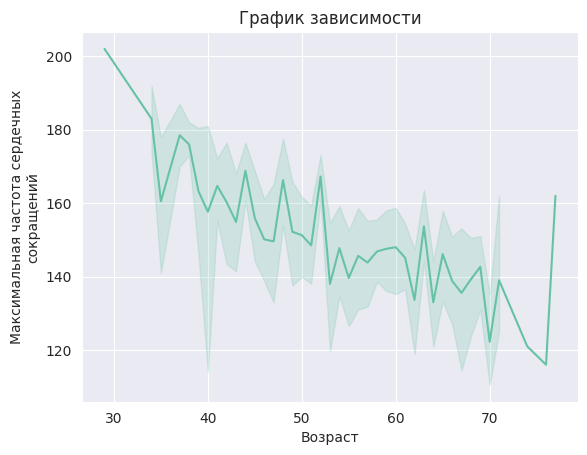

In [61]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.lineplot(
  x=df["age"],
  y=df["thalach"],
)
plt.title('График зависимости')
plt.xlabel('Возраст')
plt.ylabel('Максимальная частота сердечных\nсокращений')
plt.show()

In [50]:
x = np.array(df["age"]).reshape(-1, 1)
y = np.array(df["thalach"]).reshape(-1, 1)

In [51]:
DEGREES = 2
regression = make_pipeline(PolynomialFeatures(DEGREES), LinearRegression())
regression.fit(x, y)
predictions = regression.predict(x)
mean_squared_error = np.mean((predictions - np.array(y)) ** 2)
print(f'Среднеквадратическая ошибка = {mean_squared_error}')

Среднеквадратическая ошибка = 438.229389424864


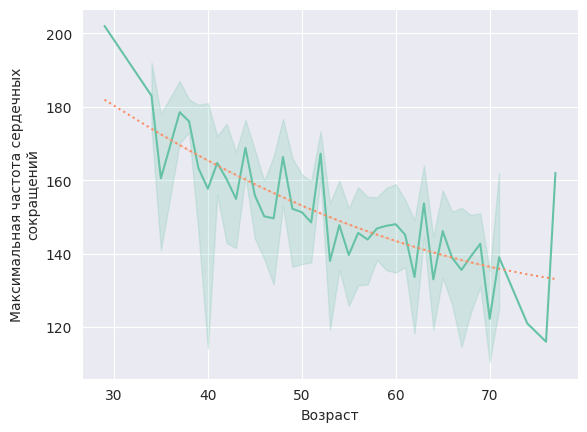

In [60]:
sns.lineplot(
  x=df["age"],
  y=df["thalach"],
  linestyle="solid"
)
sns.lineplot(
  x=df["age"],
  y=predictions.reshape(-1),
  linestyle="dotted"
)
plt.xlabel('Возраст')
plt.ylabel('Максимальная частота сердечных\nсокращений')
plt.show()

In [62]:
x_parameters = np.append(
  regression['linearregression'].intercept_[0],
  regression['linearregression'].coef_[0][1:]
)
x_parameters

array([ 2.40686789e+02, -2.40769799e+00,  1.31201330e-02])